## Lecture 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data_DS_Handbook\california_cities.csv')
df.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


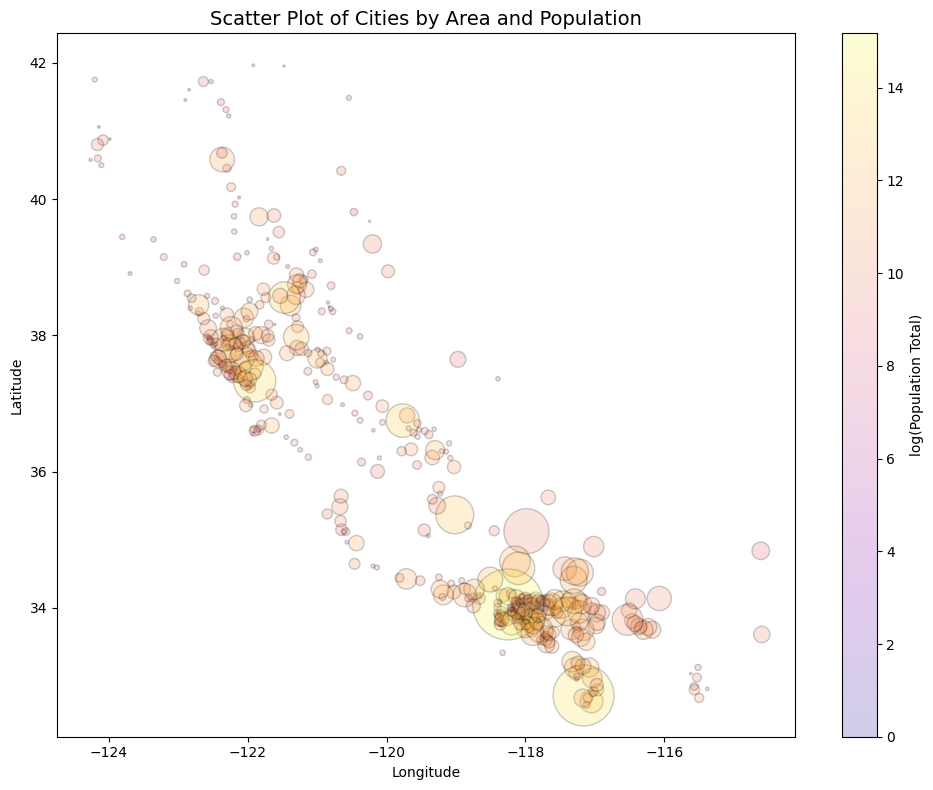

In [12]:
# Giả sử df là DataFrame bạn đã có
# df = pd.read_csv(...)  # nếu cần đọc từ file

# Loại bỏ các hàng có giá trị thiếu trong các cột quan trọng
df = df.dropna(subset=["latd", "longd", "area_total_km2", "population_total"])

# Tính kích thước marker dựa vào diện tích (scale lại để dễ nhìn)
area_scale = 2  # scale factor cho dễ điều chỉnh
sizes = df["area_total_km2"] * area_scale

# Màu sắc dựa vào log của dân số
colors = np.log(df["population_total"])

# Tạo figure và axes theo kiểu OO
fig, ax = plt.subplots(figsize=(10, 8))

# Vẽ scatter plot
scatter = ax.scatter(
    df["longd"], df["latd"],
    s=sizes,
    c=colors,
    cmap="plasma",  # hoặc "plasma", "coolwarm", v.v.
    alpha=0.2,
    edgecolors='k'
)

# Thêm colorbar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('log(Population Total)')

# Thêm tiêu đề và nhãn trục
ax.set_title("Scatter Plot of Cities by Area and Population", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
